In [1]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import os, json
from random import sample
from pyvis.network import Network
from bokeh.plotting import figure, from_networkx
from bokeh.io import output_file, show

In [2]:
data = {}
with open('out/out.json', 'r') as f:
    data = f.read()
data = json.loads(data)

In [3]:
data1 = {}
for key in data:
    # if len(data1) > 15: # data1 это если хочется посмотреть не на всех данных
    #     break
    data1[key] = data[key]

In [4]:
gr = nx.Graph()
gr.add_nodes_from = data1.keys
for url, item in data1.items():
    for key, edges in item.items():
        gr.add_edges_from(([(url, (key, edge)) for edge in edges]))

print('Num of components:', nx.number_connected_components(gr)) # Количество компонент связности

Num of components: 5066


In [17]:
groups = list(map(lambda x: [el for el in x if isinstance(el, str)], nx.connected_components(gr)))

In [18]:
def count_type_in_list(l, type):
    return sum([1 for el in l if isinstance(el, type)])

big_groups = list(filter(lambda x: count_type_in_list(x, str) > 1,  nx.connected_components(gr)))

tuples_big_groups = list(map(lambda x: [el for el in x if isinstance(el, tuple)], big_groups))

tuples_nn = [list(filter(lambda x: x[0] not in ['email', 'phone'], l)) for l in tuples_big_groups]
tuples_nn = [el for el in tuples_nn if el != []]
print(len(tuples_nn))

0


In [19]:
sorted(data, key=len, reverse=True)

['saadiyat-grove.metropolitan.realestate.html',
 'al-habtoor-city.dubai-properties.vip.html',
 'videonablyudenie-velikij-novgorod.ru.html',
 'xn-----8kcgobd2aeh3a0ajff9n.xn--p1ai.html',
 'изумрудный-город-официальный-сайт.рф.html',
 'gems-estates-cavalli-degrisogono.ae.html',
 'address-villas-hillcrest-dubai.com.html',
 'izgotovlenie-metallokonstrukciy.ru.html',
 'kempinski-residences-the-creek.com.html',
 '2.ac-biryuzovaya-zhemchuzhina.ru.html',
 'canal-front-residences-dubai.com.html',
 'district-one-villas-mbr-city.com.html',
 'dubai-investment.sales-office.ae.html',
 'golf-heights-emirates-living.com.html',
 'jumeirah-living-business-bay.com.html',
 'oktyabrskaya-naberezhnaya.lsr.ru.html',
 'the-farmhouses-damac-hills-2.com.html',
 'dorchester-collection-dubai.com.html',
 'emaar-beachfront-properties.com.html',
 'address-residences-the-bay.com.html',
 'beach-isle-emaar-beachfront.ae.html',
 'louvre-abu-dhabi-residences.ae.html',
 'marina-living-dubai-marina.com.html',
 'nad-al-sheb

In [20]:
print(sorted([len(el) for el in groups], reverse=True))

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


In [22]:
# print([el for el in sorted(groups, key=len, reverse=True)[16]])

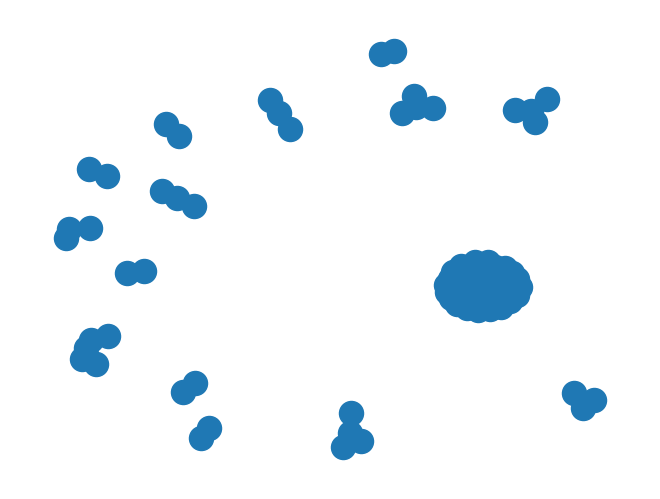

In [23]:
nx.draw(gr, pos=nx.spring_layout(gr))

In [28]:
nt = Network(height=800, width=800, notebook=True)
nt.from_nx(gr)
nt.show('nx.html')

Local cdn resources have problems on chrome/safari when used in jupyter-notebook. 


AssertionError: 

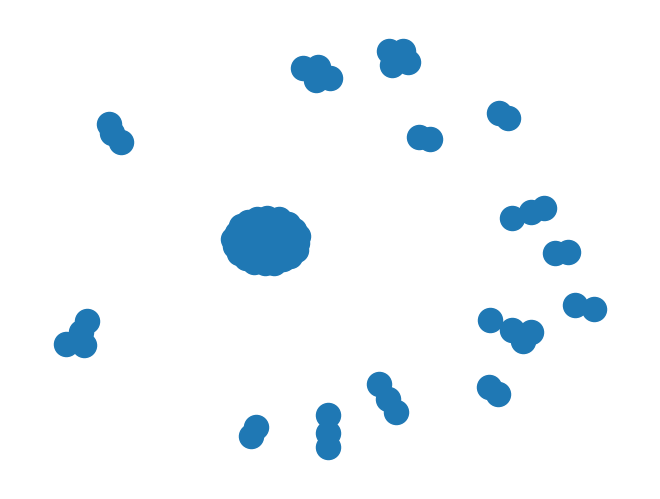

In [29]:
nx.draw(gr)

In [24]:
plot = figure()
graph = from_networkx(gr, nx.spring_layout)
plot.renderers.append(graph)
output_file("networkx_graph.html")

ValueError: failed to validate StaticLayoutProvider(id='p1078', ...).graph_layout: expected an element of Dict(Int, Seq(Any)), got {'1-mck.ru.html': array([ 0.76312246, -0.1513981 ]), ('phone', '74952888219'): array([ 0.70097768, -0.12402406]), ('phone', '74992888219'): array([ 0.79612623, -0.18519435]), '1-nalog.ru.html': array([-0.43710195, -0.84690652]), ('email', 'info@1-nalog'): array([-0.40343332, -0.8945173 ]), ('phone', '73452499637'): array([-0.49996733, -0.85475121]), ('phone', '79993438070'): array([-0.45636013, -0.89169909]), '1-ng.ru.html': array([ 0.07377773, -0.75180379]), ('phone', '74951500115'): array([ 0.05635389, -0.69529752]), ('ИНН', '9724029635'): array([ 0.07093818, -0.79563341]), '1-plus-1.ru.html': array([-0.04899979,  0.10955011]), ('email', 'yl@1-plus'): array([0.01241942, 0.01206396]), ('email', 'ak@1-plus'): array([-0.06776766,  0.22388918]), ('email', 'bma@1-plus'): array([0.0019676 , 0.04853174]), ('email', 'dks@1-plus'): array([-0.15241591,  0.05337613]), ('email', 'ekaterinashibanova@1-plus'): array([-0.04799682,  0.04233782]), ('email', 'es@1-plus'): array([0.06438154, 0.10752107]), ('email', 'ev@1-plus'): array([0.04150396, 0.03986843]), ('email', 'info@1-plus'): array([0.01082235, 0.13672025]), ('email', 'kb@1-plus'): array([0.05892741, 0.14062515]), ('email', 'kef@1-plus'): array([-0.14106385,  0.18404435]), ('email', 'kma@1-plus'): array([0.02834911, 0.19561499]), ('email', 'ktv@1-plus'): array([0.05761962, 0.07273719]), ('email', 'mav@1-plus'): array([-0.11253547,  0.1313015 ]), ('email', 'mvy@1-plus'): array([0.02064739, 0.09073665]), ('email', 'nk@1-plus'): array([-0.06525599,  0.18283442]), ('email', 'os@1-plus'): array([-0.10495705,  0.21292807]), ('email', 'rnv@1-plus'): array([-0.15034356,  0.0886258 ]), ('email', 'sna@1-plus'): array([-0.10593766,  0.17515575]), ('email', 'syv@1-plus'): array([-0.0210219 ,  0.17563092]), ('email', 'tp@1-plus'): array([-0.12423276,  0.01557834]), ('email', 'uya@1-plus'): array([-0.10434987,  0.04422936]), ('email', 'zay@1-plus'): array([-0.0222071 ,  0.00389955]), ('phone', '73852501520'): array([-0.05561937, -0.00508015]), ('phone', '79021429312'): array([0.04032201, 0.16710761]), ('phone', '79039585528'): array([-0.00097858,  0.21134826]), ('phone', '79069668880'): array([-0.0335655 ,  0.22265679]), ('phone', '79231663513'): array([-0.15119354,  0.14807183]), ('phone', '79635195489'): array([-0.16655685,  0.11692197]), ('phone', '79635368772'): array([-0.0862793 ,  0.00905475]), ('phone', '79646039911'): array([-0.11132166,  0.08145061]), '1000-1noch.ru.html': array([-0.76346587,  0.39482897]), ('phone', '88722640000'): array([-0.83940416,  0.40918028]), ('phone', '89282982222'): array([-0.73655993,  0.35242481]), ('phone', '89882915333'): array([-0.79425329,  0.44693503]), '1000kvartyr-68.ru.html': array([0.41066753, 0.79595244]), ('phone', '74752434443'): array([0.43556648, 0.85634963]), '100ra.ltd.html': array([-0.09017085,  1.        ]), ('email', 'info@100ra.ltd'): array([-0.09424767,  0.95686331]), '1015usmr.ru.html': array([0.83611842, 0.28411042]), ('email', 'office@1015usmr.ru'): array([0.84851455, 0.33245557]), ('phone', '74955935101'): array([0.88884207, 0.26878302]), '124domstroy.ru.html': array([-0.68195811, -0.35338209]), ('phone', '73912872090'): array([-0.74151119, -0.38400569]), '18-3.ru.html': array([ 0.77813004, -0.62162367]), ('phone', '88002225232'): array([ 0.83263093, -0.66497972]), '1905-ten.ru.html': array([-0.97498039, -0.01396216]), ('phone', '73433046434'): array([-0.97844705, -0.05569282]), '1a.brusnika.ru.html': array([ 0.5691192 , -0.75783747]), ('phone', '73452514967'): array([ 0.53541058, -0.70193256]), '1c-lite.ru.html': array([-0.23672956, -0.79209304]), ('email', 'rinat@soft-servis'): array([-0.28367159, -0.8076507 ]), ('email', 'sayr@soft-servis'): array([-0.21094093, -0.84513064]), ('phone', '79272361104'): array([-0.23683447, -0.73106087]), '1dogma.ru.html': array([-0.59312472,  0.61634881]), ('phone', '78612982665'): array([-0.54037547,  0.53830823]), ('phone', '78612982932'): array([-0.63457802,  0.67699279]), '1jbr.ae.html': array([ 0.9513489 , -0.15580645]), ('phone', '97148732081'): array([ 0.99286973, -0.14743569]), '1park.ru.html': array([0.74575809, 0.62887289]), ('phone', '78007009151'): array([0.79000949, 0.64396626]), ('phone', '88007009151'): array([0.68947357, 0.5821141 ])}

In [30]:
gr.nodes()

NodeView(('1-mck.ru.html', ('phone', '74952888219'), ('phone', '74992888219'), '1-nalog.ru.html', ('email', 'info@1-nalog'), ('phone', '73452499637'), ('phone', '79993438070'), '1-ng.ru.html', ('phone', '74951500115'), ('ИНН', '9724029635'), '1-plus-1.ru.html', ('email', 'yl@1-plus'), ('email', 'ak@1-plus'), ('email', 'bma@1-plus'), ('email', 'dks@1-plus'), ('email', 'ekaterinashibanova@1-plus'), ('email', 'es@1-plus'), ('email', 'ev@1-plus'), ('email', 'info@1-plus'), ('email', 'kb@1-plus'), ('email', 'kef@1-plus'), ('email', 'kma@1-plus'), ('email', 'ktv@1-plus'), ('email', 'mav@1-plus'), ('email', 'mvy@1-plus'), ('email', 'nk@1-plus'), ('email', 'os@1-plus'), ('email', 'rnv@1-plus'), ('email', 'sna@1-plus'), ('email', 'syv@1-plus'), ('email', 'tp@1-plus'), ('email', 'uya@1-plus'), ('email', 'zay@1-plus'), ('phone', '73852501520'), ('phone', '79021429312'), ('phone', '79039585528'), ('phone', '79069668880'), ('phone', '79231663513'), ('phone', '79635195489'), ('phone', '79635368772')

In [31]:
nx.davis_southern_women_graph().nodes()

NodeView(('Evelyn Jefferson', 'Laura Mandeville', 'Theresa Anderson', 'Brenda Rogers', 'Charlotte McDowd', 'Frances Anderson', 'Eleanor Nye', 'Pearl Oglethorpe', 'Ruth DeSand', 'Verne Sanderson', 'Myra Liddel', 'Katherina Rogers', 'Sylvia Avondale', 'Nora Fayette', 'Helen Lloyd', 'Dorothy Murchison', 'Olivia Carleton', 'Flora Price', 'E1', 'E2', 'E3', 'E4', 'E5', 'E6', 'E7', 'E8', 'E9', 'E10', 'E11', 'E12', 'E13', 'E14'))